# Programme for Data Analysis: Simulating a Dataset<img align="right" src="img/gmit_logo.jpg">

## Real World Phenomenon: The Impact of Education Attainment on Employment 

**GMIT Higher Diploma in Data Analytics**<br>
**Module:** Programming for Data Analytics<br>
**Author:** Martina O'Brien<br>
**Submissiom date:** 13 December 2019<br>

Submitted as part of the requirements for the GMIT Higher Diploma in Data Analysis as part of the module Programme for Data Analysis 2019.

## Table of Contents: 
[**Section 1: Introduction:**](#section1)<br/>
    [1.1:Introduction and Background](#section1)
  
[**Section 2:Modeling and Sythesising the Data:**](#section2)<br/>
    [2.1: Setting up the dataframe](#section2)<br/>
    [2.2: Creating Dataframe](#section2.2)<br/>
    [2.3: Distributions in the Dataframe](#section2.3)<br/>
    [2.4: Relationships between the variables](#section2.4)

[**Section 3: Conclusion:**](#section3)   
    [3.1: Potential areas of future explorations](#section3.1)

[**Section 4: References:**](#ref)<br/>
    [4.1: References](#ref4.1)<br/>
    [4.2: Useful Links](#ref4.2)

<a id='section1'></a>
## Section 1: Introduction

#### 1.1. Introduction and Background:
 
Educational attainment is well known to be a factor influencing the employment predictability of an individual [**(1)**](#ref1). In Ireland, it is compulsory to attend full time education from the ages of 6 - 16 years or until the finish of 3 years of second level education or the completion of the Junior Cycle curriculum under the Education Act 2000 [**(2)**](#ref2). While Ireland is currently reaching full employment, with only 4.8% unemployment still existing [**(3)**](#ref3). This rate is nearly equal to that of in 2007 before the economic recession occurred. This notebook explores data modelled on the predictability of an individual's employment status in relation to the highest level of education completed.<br>

While the overall picture of employment looks healthy, there are still concerning statistics amongst certain groups of individuals in particular early school leavers (ESLs) [**(4)**](#ref4). Conversely, young people also experience high rates of unemployment in Ireland with 12.5% of young people. [**(5)**](#ref5),[**(6)**](#ref6). Conversely, It is important to understand the relationship between education and employment in order to address the arising needs and promote resilience for individuals within recession as it is well know that those with higher education levels are more likely to be employed.

##### About this dataset:  <br>
In November, 2019, the most recent Educational Attainment Thematic Report 2019 was released by the Central Statistics Office, detailing the key findings in the relationship between educational attainment and employment [**(7)**](#ref7)  This notebook will explore the relationship between educational attainment and employment in Ireland today.

The dataset will contain 1000 data points over 4 variable: gender, age, educational attainment and employment.

| Variable  | Type | Description |
| --- | --- | --- |
| Gender | Categorical | Sex - Male/Female |
| Age | Numerical | Value between 25 and 65 years of ages|
| Educational Attainment | Categorical | Highest level of education obtained|
|Employment | Categorical | Employment status - Yes/No|


A dataset will be modelled on the findings of the above report insofar as possible and randomly synthesised for the purpose of this report. The weighted variables and methodology will be outlined in the next section. 


##### Motivation for this project: 
As a youth work professional in the area of youth entrepreneurship, identifying barriers for accessing employment is a key aspect of the role. This project will enable me to gain some further insight into the current picture of unemployment in Ireland and the socio economic factors that may be associated with that.   

<a id='section2'></a>
## Section 2: Modelling and Synthesising the Data

<a id='section2'></a>
### 2.1: Creating a dataframe:

In this section, a dataframe will be created using the numpy.random function. The data will be replicable where applicable. Firstly, the data for the variables will be created. This data is based on CSO variance on each of the four variables.

##### Importing Libraries for use in the Notebook

In [1]:
#Importing Libraries needed for notebook
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# %matplotlib inline #calling the magic command to display plots

#### Age
Firstly, the age variable is generated. It is done by using the np.random.seed function to ensure that the data generated is the same each time the notebook is ran. Next, random ages are generated between 25 - 64 years at 1000 data points. This will represent that ages within the data set. The ages are rounded up or down to give a whole integer. Finally, the data frame is created to be used further on in the dataset. [**(8)**](#ref8),[**(9)**](#ref9),[**(10)**](#ref10)

In [2]:
np.random.seed(10) #Using the seed function to ensure the output in the same every time the notebook is run
#(8)
age =np.random.randint(25,65,1000) # randomly generate numbers between 25 and 64 with 1000 datapoint
#(9)
age = age.round(0) #Round the integers
#(10)
age_df = pd.DataFrame(age, columns=['Age'])#Creating a dataframe with a column heading 'Age'
age_df.head()# Displaying the head of the dataframe

,Age
0,34
1,61
2,40
3,25
4,53


In [3]:
age_df.describe()

,Age
count,1000.000000
mean,44.804000
std,11.534237
min,25.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,64.000000


The mean of the dataframe is 44.31 years and the mode is 43. This spread will be visualised in the next section [**(11)**](#ref11). 

#### Education Attainment

The Education Attainment variable is categorical with 5 values: *Primary Level, Lower Secondary Level, Upper Secondary Level, Post Level Certificate and Third Level*. Using the Thematic Report from November 2019 referenced in this sections introduction, weighting will be added in to ensure the data is simulating a real life phenomenon [**(12)**](#ref12).

In [4]:
#References for values contained in the dataset
level = ['Primary Level', 'Lower Secondary', 'Higher Secondary', 'Post Leaving Certificate', 'Third Level']
#Based on statistics, a probability for each string is created.
# Probability is as follows: Primary Level is the lowest, Lower Secondary is .11 and so on
prob = [0.05, 0.11, 0.22, 0.15, 0.47]
education_level = np.random.choice(level, 1000, p=prob) #random choice is used to generate the dataframe
education_level_df = pd.DataFrame(education_level, columns=['Education Level'])# Creates a dataframe 
education_level_df.head()#showing the first 5 data entries

,Education Level
0,Third Level
1,Post Leaving Certificate
2,Post Leaving Certificate
3,Post Leaving Certificate
4,Third Level


The describe function will now be called to give an overview of the statistics and also highlights if there are any missing values. Third level is the most frequent level of education attained in the dataset as per the weighting applied previously.

In [5]:
education_level_df.describe() #using the df.describe function to give discriptive statistics

,Education Level
count,1000
unique,5
top,Third Level
freq,471


#### Gender

The Gender dataframe is now compiled for the dataset using the 'Male' and 'Female' as collected in the Central Statistics Office Census 2016. Ireland has almost equal amounts of people identifying as male and female. [**(13)**](#ref13)

In [6]:
gender = ['male','female'] #values as per CSO Census
prob_gender = [.4961,.5039] #breakdown of values
sex = np.random.choice(gender, 1000, p = prob_gender)#random choice generates the data
gender_df = pd.DataFrame(sex, columns=['Gender'])#dataframe is displayed
gender_df.head() #showing the first five data entries

,Gender
0,female
1,male
2,male
3,male
4,male


**Note**: The df.head function does not represent the breakdown of the variables, it only represents the first 5 datapoints.

In [7]:
gender_df.describe() #descriptive statistics of the Gender variable

,Gender
count,1000
unique,2
top,male
freq,507


#### Employment Status

The last variable added in the category 'Employment Status', denoting whether or not an individual was in employment at the time of data collection [**(14)**](#ref14), based on the October, 2019 statistics released by the Central Statistics Office. 

In [8]:
status = ['Employed', 'Unemployed']#create data for variable
prob_employment = [0.958,0.042]#created a probability for value
employment = np.random.choice(status, 1000, p=prob_employment) #random choice for the variables
employment_df = pd.DataFrame(employment, columns=['Employment Status'])##creating the dataframe for the variable
employment_df.head()#showing the first 5 data entries

,Employment Status
0,Employed
1,Employed
2,Employed
3,Employed
4,Employed


In [9]:
employment_df.describe() #descriptive statistics of the Employment Status variable

,Employment Status
count,1000
unique,2
top,Employed
freq,962


 <a id='section2.2'></a>
 ### 2.2 Creating Dataframe

Now that all the variables have their values, we will concanentate them into the dataframe that will be used to explore the link between educational attainment and employment status. The pd.concat function within pandas will be used [**(15)**](#ref15),[**(16)**](#ref16),[**(17)**](#ref17)

In [10]:
from IPython.display import display, HTML #(16 https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook)
merged = pd.concat([age_df, education_level_df, gender_df, employment_df], axis=1)
#using pd.concat to merge all dataframes into one
merged_df = pd.DataFrame(merged)#Creating the dataframe the merged data
merged_df.to_csv("merged_df.csv") # #save dataset as to a csv file with the notebook(17) 
display(HTML(merged_df.to_html()))#displaying the merged dataframe using the toggle function.

,Age,Education Level,Gender,Employment Status
0,34,Third Level,female,Employed
1,61,Post Leaving Certificate,male,Employed
2,40,Post Leaving Certificate,male,Employed
3,25,Post Leaving Certificate,male,Employed
4,53,Third Level,male,Employed
5,50,Post Leaving Certificate,female,Employed
6,54,Higher Secondary,female,Employed
7,54,Third Level,male,Employed
8,33,Post Leaving Certificate,female,Employed
9,34,Lower Secondary,male,Employed


 <a id='section2.3'></a>
### 2.3: Distributions in the Dataframe

The section will visualise the distributions of each of the variables that exist with ithe dataset. This provides an insight in the amount of times a value occurs in each variable [**(18)**](#ref18). 

#### Age

The below countplot displays the age distribution for the whole dataset indication the most and lest frequent ages in the dataset.

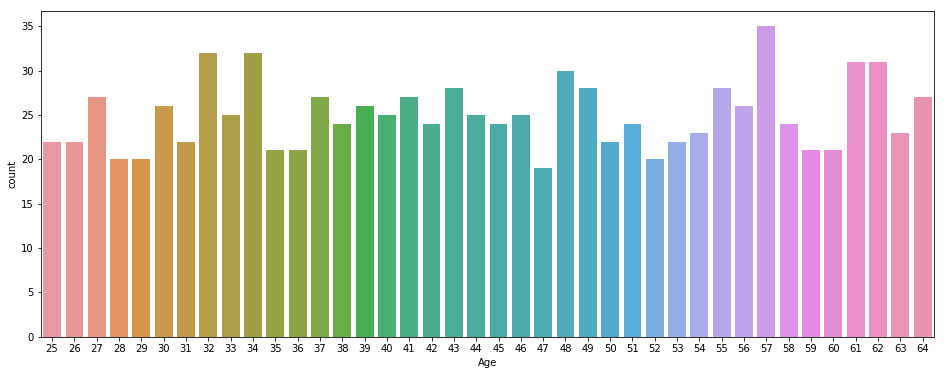

In [11]:
plt.figure(figsize=(16, 6)) # etting the size of the plot
sns.countplot('Age', data= age_df) # Inputting the parameters

C:\Users\Owner1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


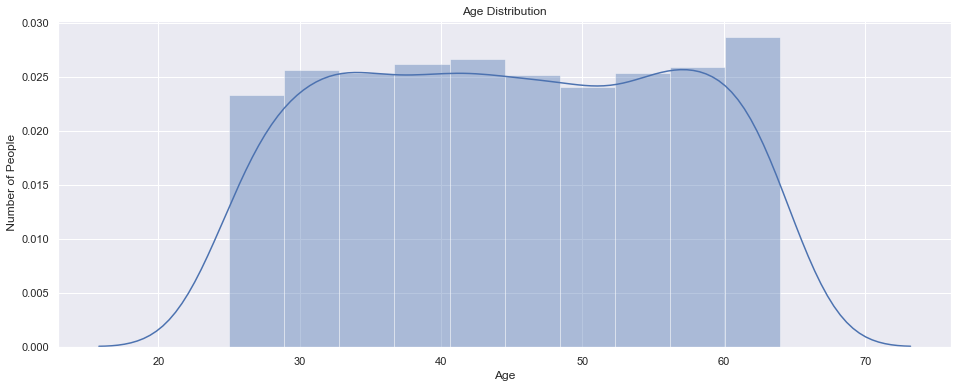

In [12]:
sns.set(rc={"figure.figsize": (16, 6)})
ax = sns.distplot(age_df)
plt.title("Age Distribution") # Title for the graph
plt.xlabel("Age") # X-Axis labelling
plt.ylabel(" Number of People") # Y-Axis labelling
plt.show()

As the Age variable was left completely random it is explected that the output would be relatively uniform which can be seen in the above plot which has more than one peak that are not overly distinct which may indicate two unimodal distributions [**(19)**](#ref19), [**(20)**](#ref20)

#### Educational Attainment

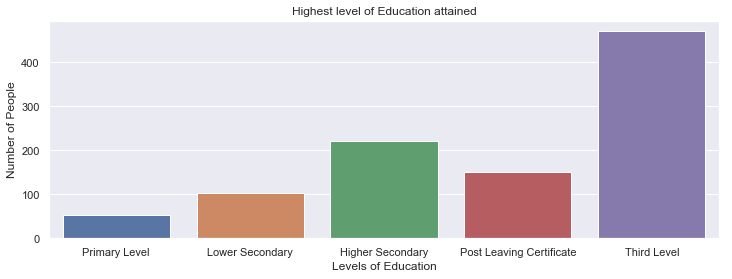

In [13]:
sns.set(rc={"figure.figsize": (12,4 )})
ax = sns.countplot(x ='Education Level',
                   data = education_level_df, 
                   order=["Primary Level", "Lower Secondary", "Higher Secondary","Post Leaving Certificate","Third Level"])
plt.title("Highest level of Education attained") #Title for the plot
plt.xlabel("Levels of Education") # Label X-axis
plt.ylabel("Number of People") # Label Y- axis
plt.show()

The above bar chart outlines the counts of each individual's educational attainment based on the probability parameters set as given in the Thematic Report. As the levels of education increase as do the numbers of completion with the exception of Post Leaving Certificate due to the nature of Post Leaving Certificate being an alternative pathway to employment or third level education.

#### Gender

The below barchart demonstrates the breakdown of male to female in the dataset. The females account for slightly more data points compared to male, similiar to the current rate in Ireland.

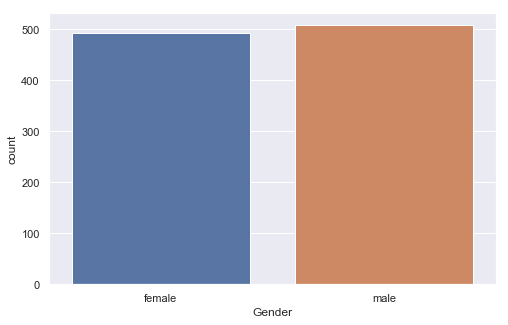

In [14]:
plt.figure(figsize=(8,5)) # setting the size of the plot
sns.countplot('Gender', data= gender_df) # Inputting the variables and counting the plot.

#### Employment Status

The below countplot looks at the employment breakdown, based on the employment rate of 4.2% indicated earlier.

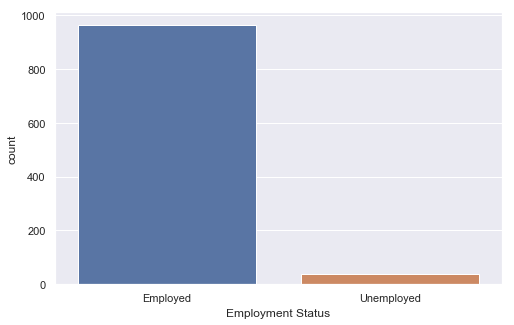

In [15]:
plt.figure(figsize=(8,5)) #setting the size of the plot
sns.countplot('Employment Status', data= employment_df) # Inputting the variables and displaying the count.

<a id='section2.4'></a>
### 2.4: Relationships between the variables

In this section, the relationships between the education attainment and the likelihood of employment in the dataset is explored and analysed through the following relationships: 

- The employment rates amongst males and females
- The employment rates by their educational attainment level
- The educational attainment level amongst males and females who are both employed and unemployed

#### Investigation 1: Employment Status amongst males and females

According the dataset is is equally likely for the male and females, included in the dataset, to be employed but there are more unemployed males than females. 

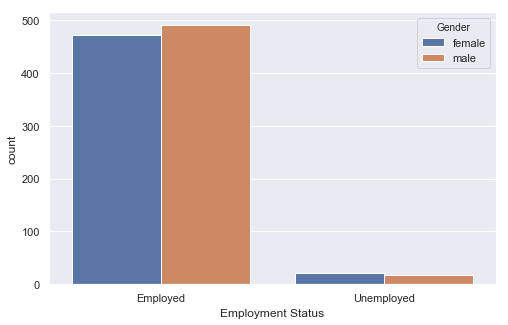

In [27]:
sns.set(rc={"figure.figsize": (8, 5)})
sns.countplot("Employment Status", hue='Gender', data= merged_df )
sns.set_palette("pastel")

#### Investigation: The highest level of education amongst males and females. 

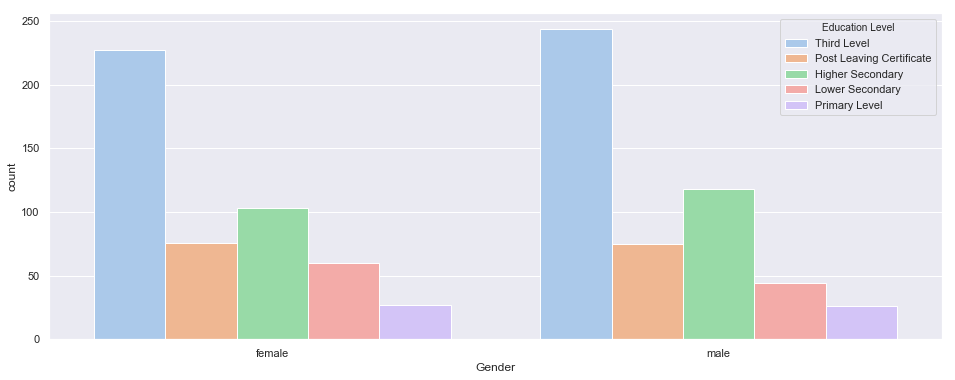

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Gender", hue='Education Level', data= merged_df)
sns.set_palette("pastel")

Developing from the previousl plot whereby there are more males unemployed than females, this plot explores the types of education attained by the sample. Third Level completion is highest for both genders. Interestingly, the biggest difference lie within the secondary education variables. While more females completed Lower Secndary than males, males then were more likely to complete Higher Secondary than females. There are similiar amounts of males and females in the sample that hoave completed Primary Level only. 

## Conclusion:

<a id='section3.1'></a>
### 3.1: Potential areas of future explorations:

From the modelling and sythesising of the data, it is clear that the relationship between employment and educational is a very complicated with a lot more external influences that must be considered. These include: 

The importance of data modelling in data analysis is also evident in this notebook because:

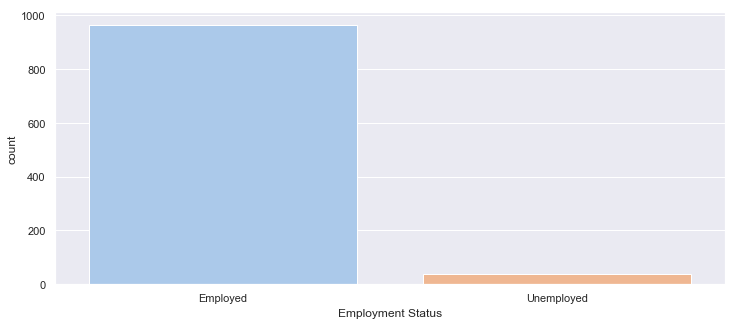

In [29]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'Employment Status', data=merged_df)

#### BOX PLOT

<Figure size 1152x288 with 0 Axes>

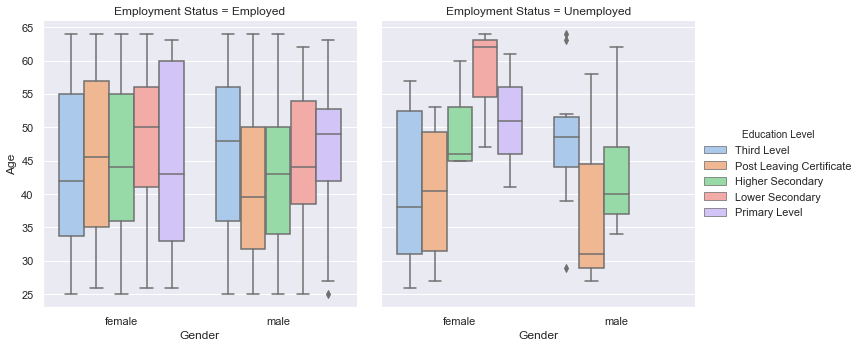

In [19]:
plt.figure(figsize=(16, 4))
sns.catplot(x="Gender",y="Age", hue="Education Level", col="Employment Status",data=merged_df,kind="box")

<a id='section3'></a>
## Section 3: Conclusion:

**Distributions within the Notebook:**<br/>
https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/

<a id='ref'></a>
## References:

<a id='ref4.1'></a>
### 4.1: References
<a id='ref1'></a>
1.	https://www.oecd-ilibrary.org/docserver/eag_highlights-2012-11-en.pdf?expires=1575233714&id=id&accname=guest&checksum=6E048A8FBA5F60213205266CDAA4CE07 http://www.welfare.ie/en/Pages/Chapter-3_-Risk-and-Protection-for-Children.aspx<br>
<a id='ref2'></a>
2.	 https://www.citizensinformation.ie/en/education/the_irish_education_system/overview_of_the_irish_education_system.html
<a id='ref3'></a>
3.	https://www.cso.ie/en/statistics/labourmarket/monthlyunemployment/<br>
<a id='ref4'></a>
4.	http://www.welfare.ie/en/Pages/Chapter-3_-Risk-and-Protection-for-Children.aspx.<br>
<a id='ref5'></a>
5.	http://publicpolicy.ie/papers/education-and-employment-a-review-of-educational-attainment-and-labour-market-outcomes/<br>
<a id='ref6'></a>
6.	https://pdf.cso.ie/www/pdf/20191203081521_Monthly_Unemployment_November_2019_summary.pdf<br>
<a id='ref7'></a>
7.	https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/
 <br>
<a id='ref8'></a>
8.	https://www.sharpsightlabs.com/blog/numpy-random-seed<br>
<a id='ref9'></a>
9.	https://www.geeksforgeeks.org/random-sampling-in-numpy-randint-function<br>
<a id='ref10'></a>
10.	https://stackoverflow.com/questions/46994426/how-to-round-numpy-array<br>
<a id='ref11'></a>
11. htttps:google.ie<br/>
<a id='ref12'></a>
12. htttps:google.ie<br/>
<a id='ref13'></a>
13. htttps:google.ie<br/>
<a id='ref14'></a>
14. htttps:google.ie<br/>
<a id='ref15'></a>
15. htttps:google.ie<br/>
<a id='ref16'></a>
16. htttps:google.ie<br/>
<a id='ref17'></a>
17. htttps:google.ie<br/>
<a id='ref18'></a>
18. htttps:google.ie<br/>
<a id='ref19'></a>
19. htttps:google.ie<br/>
<a id='ref20'></a>
20. htttps:google.ie<br/>




<a id='ref4.2'></a>
### 4.2: Useful Links

# EXAMPLE

In [20]:
group_gender = merged_df.groupby("Gender")
group_gender

In [21]:
group_gender.mean()

,Age
Gender,
female,44.858012
male,44.751479


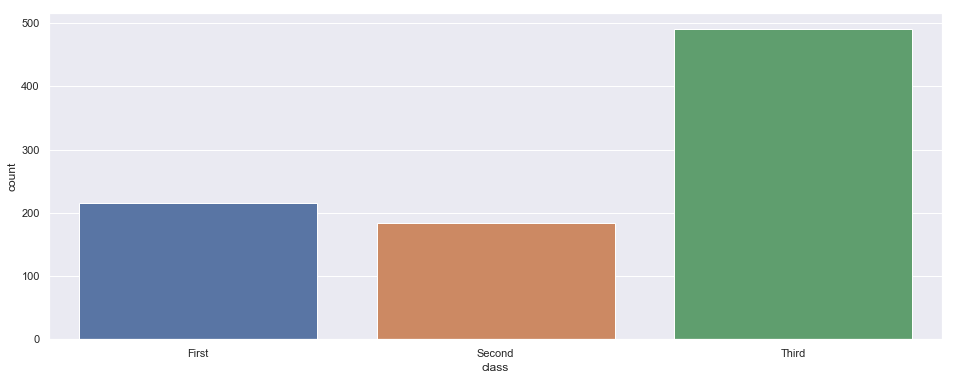

In [22]:
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", data=titanic)

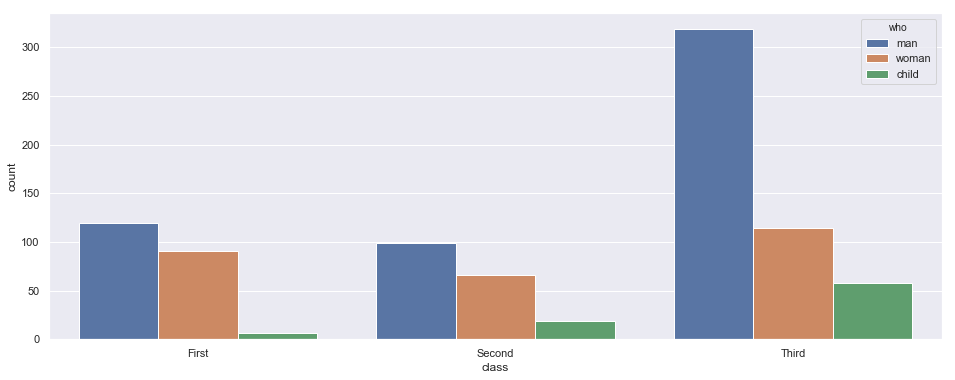

In [23]:
ax = sns.countplot(x="class", hue="who", data=titanic)

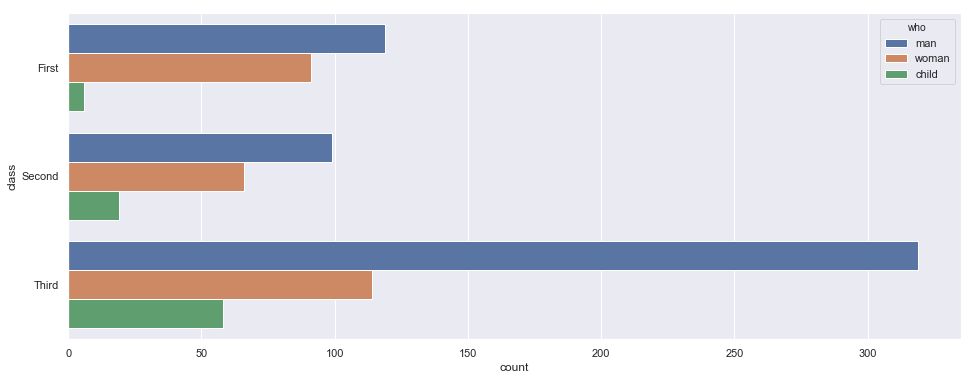

In [24]:
ax = sns.countplot(y="class", hue="who", data=titanic)

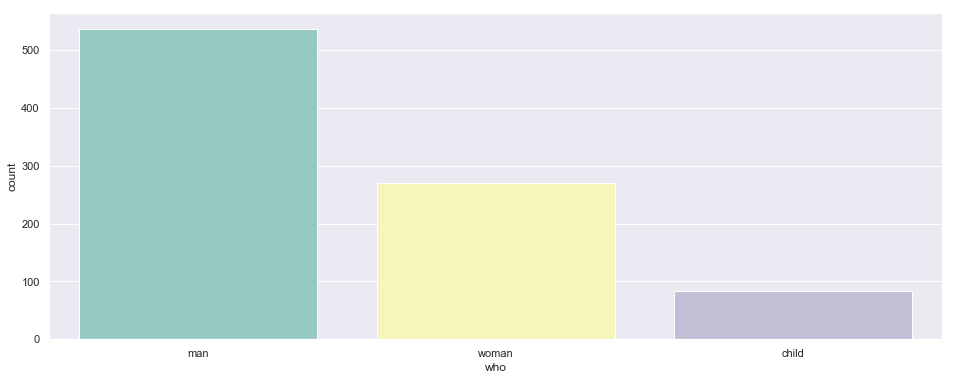

In [25]:
ax = sns.countplot(x="who", data=titanic, palette="Set3")